In [1]:
#Getting things ready for the project
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
tweet_df = pd.read_csv("E:\SMSSpamCollection" ,sep="\t", names = ['target', 'message'])
tweet_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
tweet_df.shape

(5572, 2)

In [5]:
tweet_df.columns

Index(['target', 'message'], dtype='object')

## EDA

In [6]:
tweet_df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
tweet_df.shape

(5572, 2)

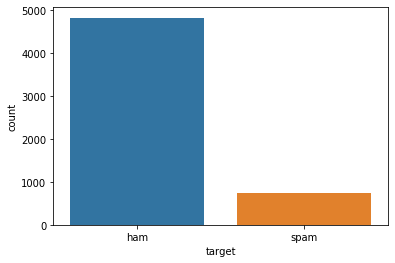

In [8]:
sns.countplot("target" ,data = tweet_df)

## Observation
sms us very less than ham.

In [9]:
tweet_df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

##  Data Preprocessing

In [10]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [11]:
# initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
# initializing the lists
clean_tweet_lst = []
tweet_len_lst = []

In [14]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_tweet_lst.append(" ".join(words))
    tweet_len_lst.append(len(words))

In [15]:
tweet_df['sms_t']=tweet_df['target'].apply(lambda x: 0 if x=='spam' else 1)

In [16]:
clean_tweet_lst = []
tweet_len_lst = []

tweet_df['message'].apply(lambda x: preprocess(x, 'lemma'))

tweet_df['clean_tweet_lema'] = clean_tweet_lst

tweet_df['tweet_length_lema'] = tweet_len_lst

In [17]:
tweet_df.head()

,target,message,sms_t,clean_tweet_lema,tweet_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",1,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,1,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,1,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,nah think go usf life around though,7


## Data Preparation

In [18]:
from sklearn.model_selection  import train_test_split
train, test = train_test_split(tweet_df,test_size=0.2,random_state=42)

In [19]:
train_clean_tweet=[]
for tweet in train['clean_tweet_lema']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet_lema']:
    test_clean_tweet.append(tweet)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")
train_features = vectorizer.fit_transform(train_clean_tweet)
test_features = vectorizer.transform(test_clean_tweet)

In [21]:
vectorizer.vocabulary_

{'reply': 4463,
 'win': 6061,
 'weekly': 5997,
 'fifa': 1873,
 'world': 6134,
 'cup': 1228,
 'held': 2383,
 'send': 4727,
 'stop': 5170,
 'end': 1654,
 'service': 4746,
 'hello': 2387,
 'sort': 5024,
 'town': 5603,
 'already': 163,
 'dont': 1496,
 'rush': 4583,
 'home': 2445,
 'eating': 1594,
 'nacho': 3523,
 'let': 3004,
 'know': 2891,
 'eta': 1709,
 'come': 1041,
 'guoyang': 2289,
 'go': 2182,
 'tell': 5391,
 'told': 5554,
 'hey': 2401,
 'sathya': 4637,
 'till': 5514,
 'dint': 1433,
 'meet': 3293,
 'even': 1720,
 'single': 4883,
 'time': 5515,
 'saw': 4649,
 'situation': 4896,
 'orange': 3786,
 'brings': 691,
 'ringtones': 4532,
 'chart': 887,
 'hero': 2398,
 'free': 2016,
 'hit': 2416,
 'week': 5995,
 'pic': 3986,
 'wap': 5942,
 'receiving': 4384,
 'tip': 5518,
 'sitting': 4895,
 'mu': 3482,
 'waiting': 5920,
 'everyone': 1729,
 'get': 2139,
 'suite': 5248,
 'take': 5337,
 'shower': 4835,
 'finish': 1897,
 'liao': 3008,
 'urgent': 5789,
 'mobile': 3404,
 'awarded': 398,
 'bonus': 62

In [22]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 6278
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 6278)


## Model Building and Evaluation

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [24]:
Classifiers = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier()]

In [25]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in Classifiers:
    fit = classifier.fit(dense_features,train['sms_t'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sms_t'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.9847533632286996
Accuracy of SVC is 0.9847533632286996
Accuracy of DecisionTreeClassifier is 0.9775784753363229


In [26]:
from sklearn import metrics
con_metric = metrics.confusion_matrix(pred,test['sms_t'])
con_metric

array([[132,   8],
       [ 17, 958]], dtype=int64)

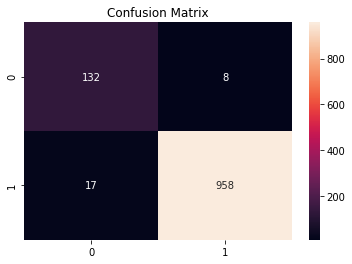

In [27]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [28]:
print(metrics.classification_report(pred,test['sms_t']))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       140
           1       0.99      0.98      0.99       975

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115

